In [10]:
import sys
sys.path.append('..')

In [11]:
from optimization import *
from oracles import *
from plot_trajectory_2d import *

In [12]:
def make_experiment(oracle, x_0, levels=None, line_search_tool=None, x_range=None, y_range=None, plot=True):
    [x_star, msg, history] = gradient_descent(oracle, x_0=x_0, trace=True, line_search_options=line_search_tool)
    if msg == "success":
        if plot:
            plot_levels(oracle.func, levels=levels, xrange=x_range, yrange=y_range)
            plot_trajectory(oracle.func, history['x'])
        # show()
        return len(history['time'])
    else:
        print(msg)

In [13]:
import numpy as np
from scipy.sparse import diags

In [14]:
def generate_quadratic_problem(n, condition_number):
    # Generate random diagonal elements in the range [1, condition_number]
    diagonal_elements = np.random.uniform(1, condition_number, size=n)
    # Set the first element to 1 and the last element to condition_number
    diagonal_elements[0] = 1
    diagonal_elements[-1] = condition_number

    # Create a sparse diagonal matrix A using scipy.sparse.diags
    A = diags(diagonal_elements, offsets=0, shape=(n, n), format='csc')

    # Generate random vector b
    b = np.random.rand(n) * 10

    return A, b

In [6]:
n = 5
condition_number = 10
A, b = generate_quadratic_problem(n, condition_number)
print("Matrix A:")
print(A.toarray())
print("Vector b:")
print(b)

Matrix A:
[[ 1.          0.          0.          0.          0.        ]
 [ 0.          5.68222838  0.          0.          0.        ]
 [ 0.          0.          7.30392527  0.          0.        ]
 [ 0.          0.          0.          4.74687929  0.        ]
 [ 0.          0.          0.          0.         10.        ]]
Vector b:
[7.12235021 1.01988407 6.94579668 8.50068719 7.0587549 ]


In [18]:
import matplotlib.pyplot as plt

x_range = [-1.5, 3]
y_range = [-1.5, 2]
def experiment_different_condition_numbers(xs, n, line_search_tool=None):
    amounts_iterations = []
    for condition_number in xs:
        A, b = generate_quadratic_problem(n, condition_number)
        A = A.toarray()
        if np.any(np.isnan(A)) or np.any(np.isnan(b)):
            print('Nan')
            return
        oracle = QuadraticOracle(A, b)
        x_0 = np.random.rand(n)
        amounts_iterations.append(make_experiment(oracle, x_0, line_search_tool=line_search_tool, x_range=x_range, y_range=y_range, plot=(n == 2)))
    return amounts_iterations
    # print(amounts_iterations)

In [ ]:
# if this cell gives you an error, try to rerun it few times. Should work :)

xs = np.arange(1, 301, 5)
ys = []
for _ in range(3):
    ys.append(experiment_different_condition_numbers(xs, n=2))
plt.clf()
for y in ys:
    plt.plot(xs, y, c='b')
plt.show()

d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computational_error
d_k computationa

[111,
 111,
 111,
 107,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

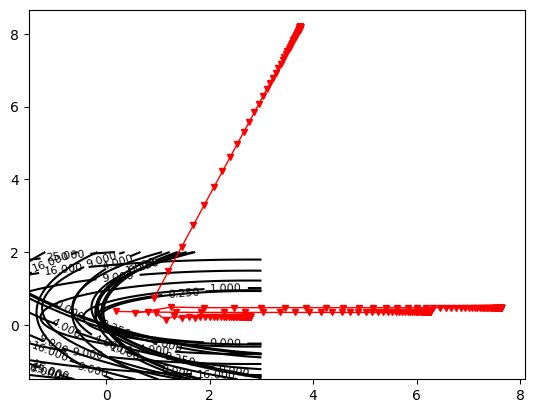

In [23]:
xs = np.arange(1, 301, 5)
experiment_different_condition_numbers(xs, n=2, line_search_tool=get_line_search_tool({"method": 'Constant', "c": 1e-1}))

In [ ]:
# if this cell gives you an error, try to rerun it few times. Should work :)

color = {10: 'y', 100: 'g', 1000: 'r'}
for n in [10, 100, 1000]:
    xs = np.arange(1, 301, 5)
    ys = []
    for _ in range(1):
        ys.append(experiment_different_condition_numbers(xs, n=n))
    for y in ys:
        plt.plot(xs, y, c=color[n])
    plt.show()

In [ ]:
oracle = QuadraticOracle(A=np.array([[1, 1.0], [1.0, 10.0]]), b=np.array([1, 1]))
x_0 = np.array([25.0, 5.5])
levels = np.array([0.1, 1, 5, 10, 20, 50, 100])
print(f'Wolfe with x_0 = {x_0}')
make_experiment(oracle, x_0, levels=levels)
print('Armijo')
line_search_tool = get_line_search_tool({"method": 'Armijo', "c1": 1e-4, "alpha_0": 1})
make_experiment(oracle, x_0, levels=levels, line_search_tool=line_search_tool)
print('Constant')
line_search_tool = get_line_search_tool({"method": 'Constant', "c": 1e-1})
make_experiment(oracle, x_0, levels=levels, line_search_tool=line_search_tool)